In [1]:
import numpy as np
import seaborn as sns

%load_ext autoreload
%autoreload 2

sns.set()

In [2]:
from biobank_olink.dataset import load_olink_and_covariates

ol_df, cov_df = load_olink_and_covariates(cols_na_th=0, rows_na_th=0, corr_th=0.9)
ol_df.shape, cov_df.shape

[Memory]0.0s, 0.0min    : Loading load_olink_and_covariates...


((35256, 2715), (35256, 13))

In [3]:
from biobank_olink.dataset import get_olink_panel_mapping

m = get_olink_panel_mapping()
m.keys()

dict_keys(['cardiometabolic', 'inflammation', 'neurology', 'oncology', 'endothelial', 'immune', 'inflam', 'bp', 'renal'])

In [10]:
ol_df.columns.isin(m["endothelial"]).sum()

202

In [4]:
from biobank_olink.constants import PROJECT_ROOT
import matplotlib.pyplot as plt

figure_dir = PROJECT_ROOT / "figs"
figure_dir.mkdir(exist_ok=True)


def plot_histograms(df):
    grid_size = int(np.ceil(np.sqrt(len(df.columns))))
    plt.figure(figsize=(6 * grid_size, 6 * grid_size))
    for index, column in enumerate(df.columns):
        plt.subplot(grid_size, grid_size, index + 1)
        sns.histplot(data=df, x=column, kde=False, bins=30, hue=cov_df.sex.values.astype(str))
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(figure_dir / f"histograms_{i}_{i + 100}.png")


for i in range(0, len(ol_df.columns), 100):
    plot_histograms(ol_df.iloc[:, i:i + 100])


KeyboardInterrupt



Error in callback <function flush_figures at 0x7f381abf65f0> (for post_execute):



KeyboardInterrupt



/home/prenc/.miniconda3/envs/biobank_olink/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


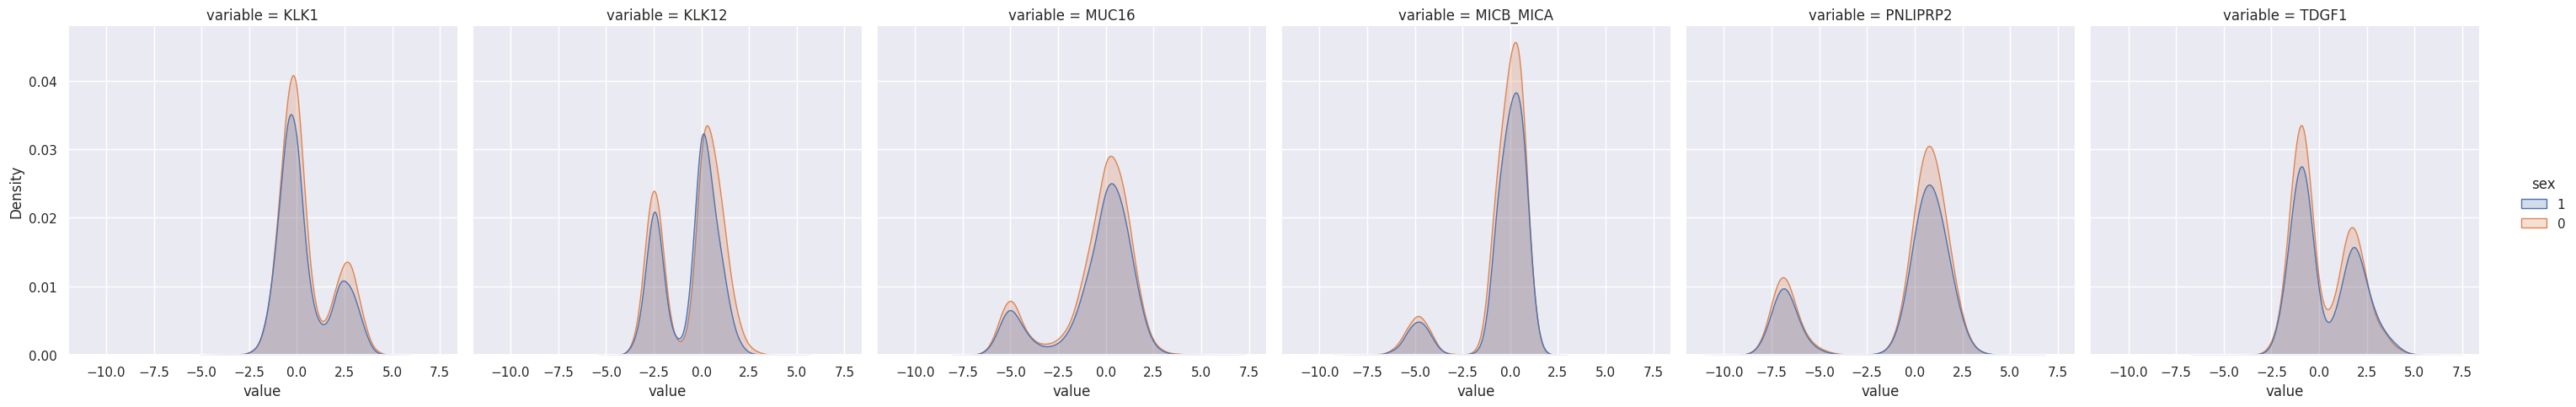

In [5]:
biomarkers = ["KLK1", "KLK12", "MUC16", "MICB_MICA", "PNLIPRP2", "TDGF1"]
data = ol_df.loc[:, biomarkers].melt(ignore_index=False)
sns.displot(data=data.reset_index(), x="value", col="variable",
            hue=cov_df.sex[data.index].reset_index(drop=True).astype(str), kind="kde", fill=True)